# 作業9

In [1]:
import pandas as pd
from statsmodels.tsa import stattools
from statsmodels.graphics.tsaplots import *
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np
from arch.unitroot import ADF

import warnings
warnings.filterwarnings("ignore")

### (a)繪製時序圖

In [2]:
# 獲取通用電氣公司（GE）資料
import yfinance as yf
GE = yf.download("GE", start="2019-01-01", end="2021-04-01",group_by="ticker") 
print(GE)

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2018-12-31   7.230769   7.326923   7.067308   7.278846   7.207815  112695960
2019-01-02   7.173077   7.865385   7.125000   7.740385   7.664851  134528264
2019-01-03   7.711538   7.884615   7.480769   7.750000   7.674372  127866960
2019-01-04   7.875000   7.942308   7.673077   7.913462   7.836239  124887152
2019-01-07   8.221154   8.451923   7.971154   8.403846   8.321836  186871776
...               ...        ...        ...        ...        ...        ...
2021-03-25  12.400000  12.930000  12.230000  12.850000  12.850000   73391900
2021-03-26  12.950000  13.130000  12.710000  12.990000  12.990000   60524700
2021-03-29  12.920000  13.050000  12.780000  12.950000  12.950000   53762900
2021-03-30  12.980000  13.360000  12.900000  13.300000  13.300000   52925100
2021-03

In [3]:
close=GE.Close
GERet = (close-close.shift(1))/close
GERet.head()

Date
2018-12-31         NaN
2019-01-02    0.059627
2019-01-03    0.001241
2019-01-04    0.020656
2019-01-07    0.058352
Name: Close, dtype: float64

In [4]:
GERet.tail()

Date
2021-03-25    0.027237
2021-03-26    0.010777
2021-03-29   -0.003089
2021-03-30    0.026316
2021-03-31   -0.012947
Name: Close, dtype: float64

In [5]:
GERet=GERet.dropna()

In [6]:
#計算自相關係數
acfs=stattools.acf(GERet)
acfs[:5]

array([ 1.        , -0.04831254,  0.05105864,  0.00264842,  0.00268008])

In [7]:
#計算偏自相關係數
pacfs=stattools.pacf(GERet)
pacfs[:5]

array([ 1.00000000e+00, -4.83980480e-02,  4.90121339e-02,  7.42817936e-03,
        6.56442812e-04])

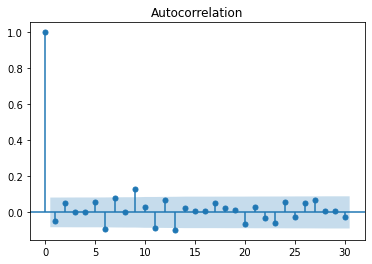

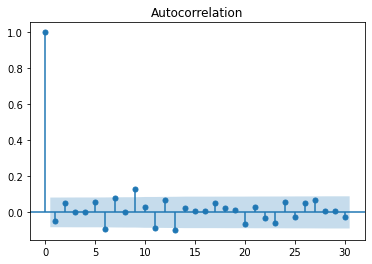

In [8]:
#繪制自相關係數圖
from statsmodels.graphics.tsaplots import *
plot_acf(GERet,use_vlines=True,lags=30)

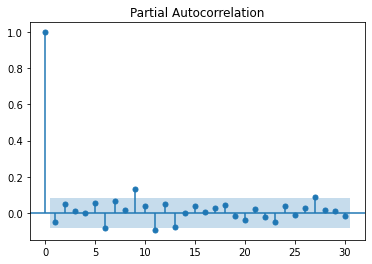

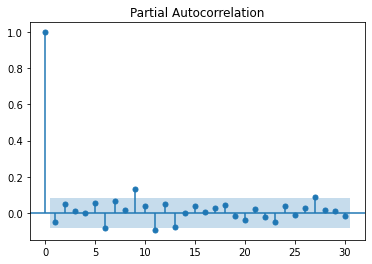

In [9]:
plot_pacf(GERet,use_vlines=True,lags=30)

Text(0.5, 1.0, '2019-2021年加權股價指數收盤指數時序圖 ')

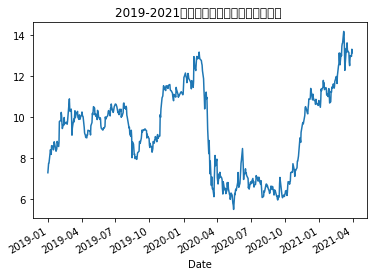

In [10]:
close.plot()
plt.title('2019-2021年加權股價指數收盤指數時序圖 ')

Text(0.5, 1.0, '2019-2021年加權股價指數收益率指數時序圖')

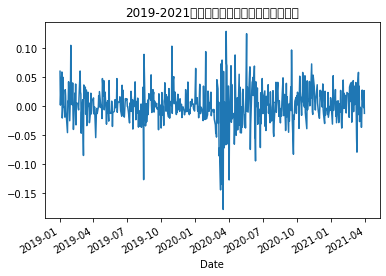

In [11]:
GERet.plot()
plt.title('2019-2021年加權股價指數收益率指數時序圖')

### (b)繪製ACF圖

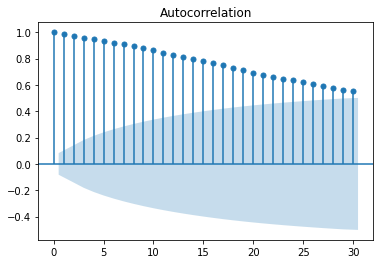

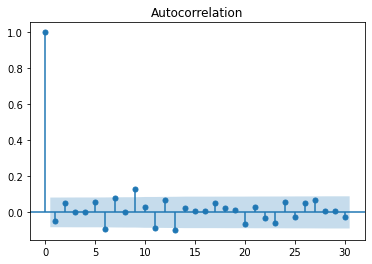

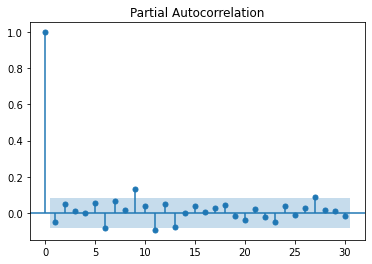

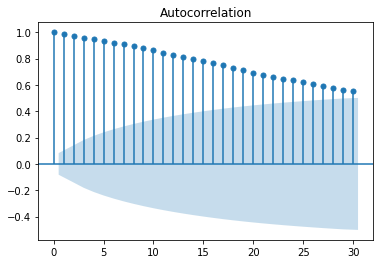

In [12]:
plot_acf(GERet,use_vlines=True,lags=30)
plot_pacf(GERet,use_vlines=True,lags=30)
plot_acf(close,use_vlines=True,lags=30)

In [13]:
adf_GERet=ADF(GERet)
print(adf_GERet.summary().as_text())
adfclose=ADF(close)
print(adfclose.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -6.212
P-value                         0.000
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
   Augmented Dickey-Fuller Results   
Test Statistic                 -1.301
P-value                         0.629
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [14]:
#生成純隨機序列
whiteNoise=np.random.standard_normal(size=500)

Text(0.5, 1.0, 'White Noise')

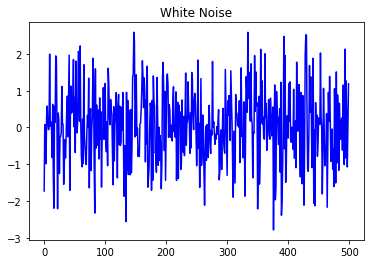

In [15]:
#繪制該序列圖
plt.plot(whiteNoise,c='b')
plt.title('White Noise')

### (c)使用Ljung-Box檢定判斷

In [16]:
LjungBox1=stattools.q_stat(stattools.acf(GERet)[1:13],len(GERet))
LjungBox1
LjungBox1[1][-1]

0.002265940760898331

In [17]:
LjungBox2=stattools.q_stat(stattools.acf(close)[1:13],len(GERet))
LjungBox2[1][-1]

0.0

### (d)在進行一次Ljung-Box檢定，但lag參數設為9

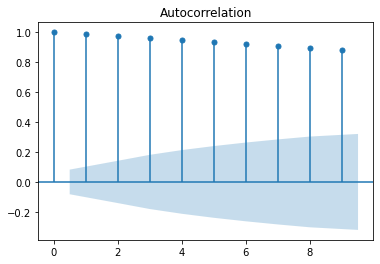

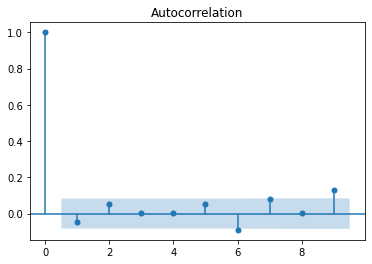

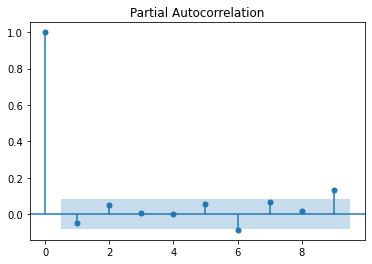

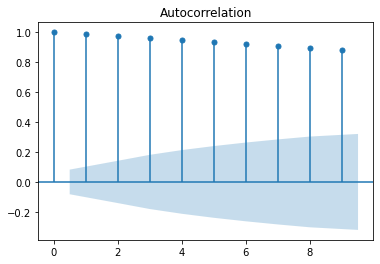

In [18]:
plot_acf(GERet,use_vlines=True,lags=9)
plot_pacf(GERet,use_vlines=True,lags=9)
plot_acf(close,use_vlines=True,lags=9)

In [19]:
adf_GERet=ADF(GERet)
print(adf_GERet.summary().as_text())
adfclose=ADF(close)
print(adfclose.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -6.212
P-value                         0.000
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
   Augmented Dickey-Fuller Results   
Test Statistic                 -1.301
P-value                         0.629
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [20]:
#生成純隨機序列
whiteNoise=np.random.standard_normal(size=500)

Text(0.5, 1.0, 'White Noise')

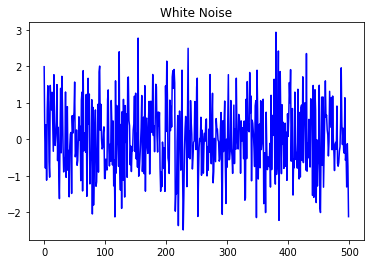

In [21]:
#繪制該序列圖
plt.plot(whiteNoise,c='b')
plt.title('White Noise')

In [22]:
LjungBox1=stattools.q_stat(stattools.acf(GERet)[1:13],len(GERet))
LjungBox1
LjungBox1[1][-1]

0.002265940760898331

In [23]:
LjungBox2=stattools.q_stat(stattools.acf(close)[1:13],len(GERet))
LjungBox2[1][-1]

0.0

### (e) 對比兩次檢定結果

#### 經比較後發現兩次檢定結果幾乎一樣，Ljung-Box檢定結果值相同

# 作業10

### (a) 繪製時間序列圖

In [24]:
# 獲取標普500資料
SP500 = yf.download("^SP500TR", start="2019-01-01", end="2021-04-01",group_by="ticker") 
print(SP500)

[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2018-12-31  4968.500000  4988.899902  4936.580078  4984.220215  4984.220215   
2019-01-02  4924.810059  5009.240234  4906.149902  4990.560059  4990.560059   
2019-01-03  4955.830078  4958.060059  4860.859863  4868.299805  4868.299805   
2019-01-04  4920.879883  5047.560059  4920.879883  5035.450195  5035.450195   
2019-01-07  5042.770020  5103.479980  5020.830078  5070.759766  5070.759766   
...                 ...          ...          ...          ...          ...   
2021-03-25  8042.959961  8125.979980  7990.020020  8105.509766  8105.509766   
2021-03-26  8121.330078  8246.900391  8121.330078  8240.379883  8240.379883   
2021-03-29  8229.549805  8255.469727  8175.830078  8233.240234  8233.240234   
2021-03-30  8218.030273  8227.480469  8178.810059  8208.099609

In [25]:
close=SP500.Close
SP500Ret = (close-close.shift(1))/close
SP500Ret.head()
SP500Ret.tail()
SP500Ret=SP500Ret.dropna()

In [26]:
#計算自相關係數
acfs=stattools.acf(SP500Ret)
acfs[:5]

array([ 1.        , -0.30465653,  0.24387232, -0.01272091, -0.08452034])

In [27]:
#計算偏自相關係數
pacfs=stattools.pacf(SP500Ret)
pacfs[:5]

array([ 1.        , -0.30519575,  0.16716297,  0.11393523, -0.11705021])

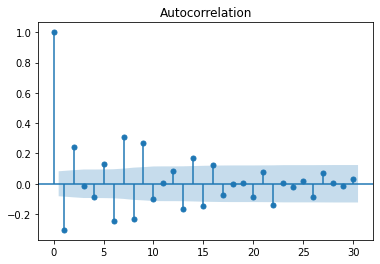

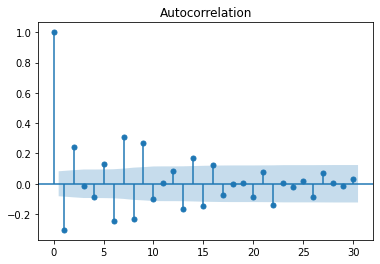

In [28]:
#繪制自相關係數圖
from statsmodels.graphics.tsaplots import *
plot_acf(SP500Ret,use_vlines=True,lags=30)

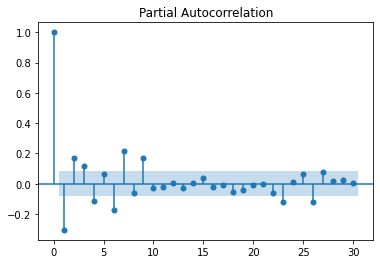

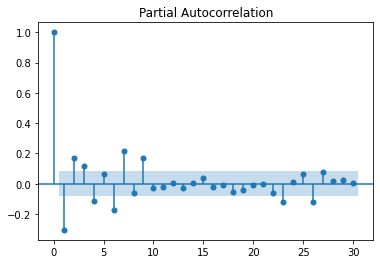

In [29]:
plot_pacf(SP500Ret,use_vlines=True,lags=30)

Text(0.5, 1.0, '2019-2021年加權股價指數收盤指數時序圖 ')

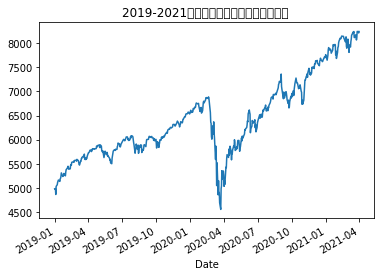

In [30]:
close.plot()
plt.title('2019-2021年加權股價指數收盤指數時序圖 ')

Text(0.5, 1.0, '2019-2021年加權股價指數收益率指數時序圖')

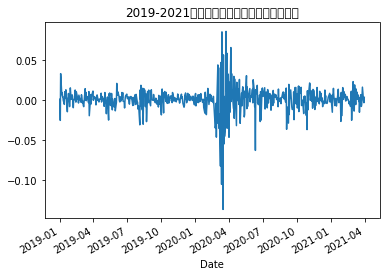

In [31]:
SP500Ret.plot()
plt.title('2019-2021年加權股價指數收益率指數時序圖')

### (b) 繪製ACF圖與PACF圖

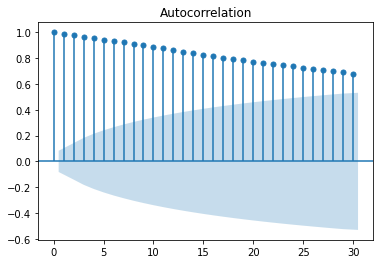

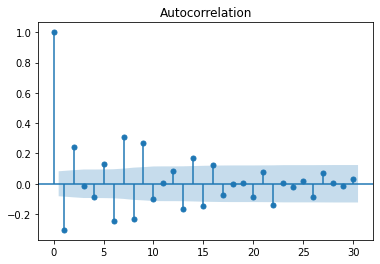

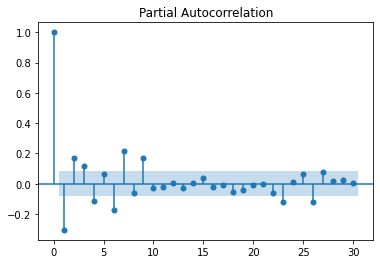

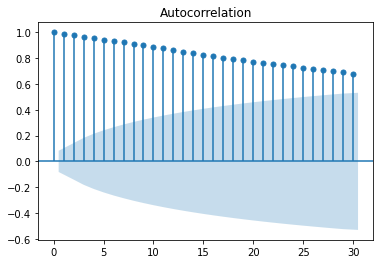

In [32]:
plot_acf(SP500Ret,use_vlines=True,lags=30)
plot_pacf(SP500Ret,use_vlines=True,lags=30)
plot_acf(close,use_vlines=True,lags=30)

### (c) 進行ADF檢定

In [33]:
adf_SP500Ret=ADF(SP500Ret)
print(adf_SP500Ret.summary().as_text())
adfclose=ADF(close)
print(adfclose.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -6.376
P-value                         0.000
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
   Augmented Dickey-Fuller Results   
Test Statistic                 -0.940
P-value                         0.775
Lags                                9
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
